In [ ]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (10, 6)


In [21]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")



In [23]:
# Show basic info
print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Info ---")
df.info()


--- Dataset Head ---
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Sept

In [27]:
# Clean and prepare data
print("\n--- Data Cleaning ---")
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dropna(subset=['date_added', 'country', 'rating'], inplace=True)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()


--- Data Cleaning ---


### In this step, I cleaned the dataset by converting the date_added column to a proper datetime format, which allowed me to extract useful time-based features like the year and month when content was added. I also removed rows with missing values in key columns such as date_added, country, and rating to ensure accurate analysis. This preparation made the data ready for exploring content trends over time.



--- Content Type Distribution ---


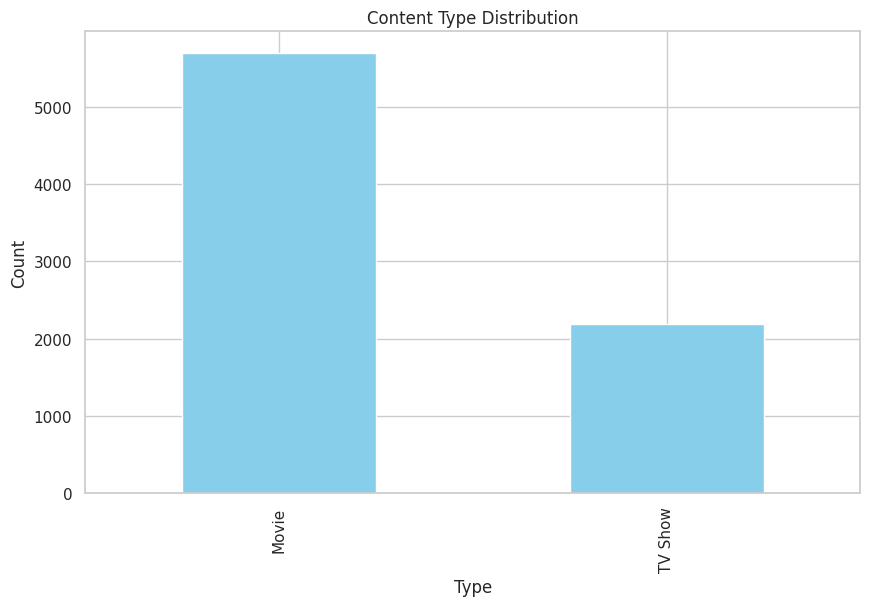

In [28]:
# EDA: Movies vs TV Shows
print("\n--- Content Type Distribution ---")
df['type'].value_counts().plot(kind='bar', title='Content Type Distribution', color='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

### In this analysis, I examined the distribution of content types on Netflix by counting how many entries are classified as “Movies” versus “TV Shows.” Using a bar chart, it’s easy to see which type dominates the platform, helping us understand Netflix’s content focus.


--- Top 10 Countries ---


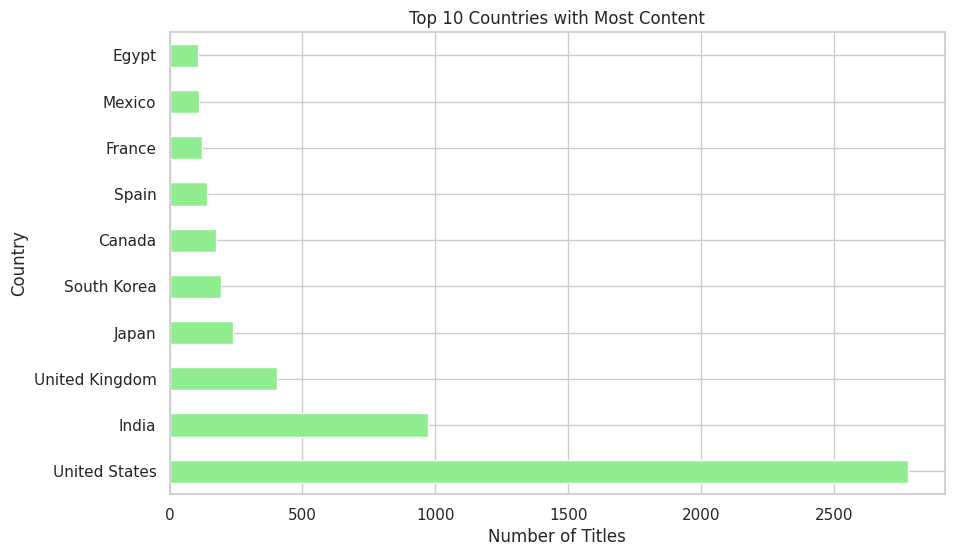

In [29]:
# EDA: Top 10 Countries with Most Content
print("\n--- Top 10 Countries ---")
df['country'].value_counts().head(10).plot(kind='barh', title='Top 10 Countries with Most Content', color='lightgreen')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

### In this step, I explored which countries contribute the most content to Netflix’s library. By counting the number of titles produced in each country and visualizing the top 10 with a horizontal bar chart, we get a clear picture of the geographic distribution of Netflix’s offerings. This helps highlight Netflix’s global reach and content diversity.




--- Content Growth Over Years ---


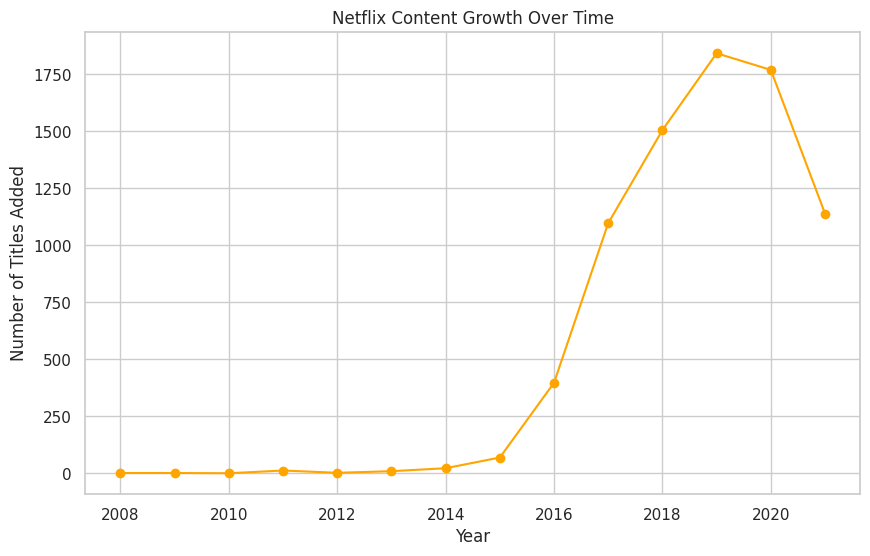

In [30]:
# EDA: Content Added Per Year
print("\n--- Content Growth Over Years ---")
df['year_added'].value_counts().sort_index().plot(kind='line', marker='o', title='Netflix Content Growth Over Time', color='orange')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

### This chart shows how Netflix’s content library has grown over the years by plotting the number of titles added each year. The line graph reveals trends in Netflix’s expansion, highlighting periods of rapid content addition and helping us understand the platform’s growth trajectory.




--- Top 10 Genres ---


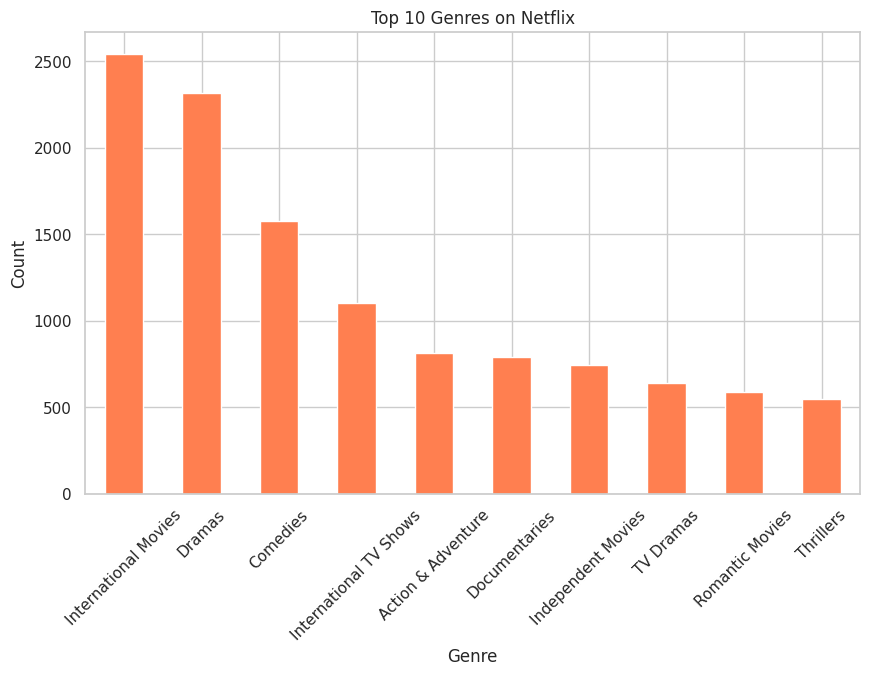

In [31]:
# EDA: Top Genres
print("\n--- Top 10 Genres ---")
df['listed_in'] = df['listed_in'].astype(str)  # in case of NaNs
genres = df['listed_in'].str.split(',').explode().str.strip()
genres.value_counts().head(10).plot(kind='bar', title='Top 10 Genres on Netflix', color='coral')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### This analysis breaks down Netflix’s content by genre to find out which types of shows and movies are most common. Since some titles belong to multiple genres, I split the genre lists and counted each genre individually. The resulting bar chart highlights the top 10 genres on Netflix, providing insight into viewer preferences and content variety.

In [32]:
# Save cleaned dataset (optional)
df.to_csv("netflix_cleaned.csv", index=False)
print("\nCleaned data saved as 'netflix_cleaned.csv'")


Cleaned data saved as 'netflix_cleaned.csv'
